In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
pd.set_option("display.max_colwidth", 200)

In [2]:
from sklearn.datasets import fetch_20newsgroups


path = './cit-HepTh-abstracts'

i = 0
data = np.array([])
for path2 in os.listdir(path):
    path2 = path+'/'+path2
    i +=1
    print(path2)
    if(i == 11):
        break
    for filename in glob.glob(os.path.join(path2, '*.abs')):
        with open(filename) as f:
            content = f.read()
            content = content.split("\\\\")
            title = content[1]
            title = title.split('Title:')[1].split('Authors')[0]
            content = title + content[2]
            content = content.replace("\\", "")
            content = content.replace("`", "")
            content = content.lower()
            data = np.concatenate((data,np.array([content])))


# dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
# documents = dataset.data
# len(documents)

documents = data

data

# documents

./cit-HepTh-abstracts/.DS_Store
./cit-HepTh-abstracts/1993
./cit-HepTh-abstracts/1994
./cit-HepTh-abstracts/1995
./cit-HepTh-abstracts/1992
./cit-HepTh-abstracts/2001
./cit-HepTh-abstracts/2000
./cit-HepTh-abstracts/1997
./cit-HepTh-abstracts/1999
./cit-HepTh-abstracts/1998
./cit-HepTh-abstracts/1996


array([' on integrable c<1 open--closed string theory\n\n  the integrable structure of open--closed string theories in the $(p,q)$\nconformal minimal model backgrounds is presented. the relation between the\n$tau$--function of the closed string theory and that of the open--closed\nstring theory is uncovered. the resulting description of the open--closed\nstring theory is shown to fit very naturally into the framework of the\n$sl(q,{rm c})$ kdv hierarchies. in particular, the twisted bosons which\nunderlie and organise the structure of the closed string theory play a similar\nrole here and may be employed to derive loop equations and correlation function\nrecursion relations for the open--closed strings in a simple way.\n',
       ' schwinger effect in string theory\n\n  i discuss the quantum instability of an electric field in a theory of open\nstrings.\n',
       ' proof of jacobi identity in generalized quantum dynamics\n\n  we prove that the jacobi identity for the generalized poiss

In [3]:
dataset.target_names

NameError: name 'dataset' is not defined

In [4]:
news_df = pd.DataFrame({'document':documents})

# removing everything except alphabets`
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make all text lowercase
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [22]:

# from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

stop_words = stopwords.words('english')

# tokenization
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) 

# Lemmatize
tokenized_doc = tokenized_doc.apply(lambda x: [lemmatize_stemming(item) for item in x])


# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
    
news_df['clean_doc'] = detokenized_doc

[nltk_data] Downloading package stopwords to /Users/amir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/amir/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
                             max_features= 1000, # keep top 1000 terms 
                             max_df = 0.5, 
                             smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # check shape of the document-term matrix


(22618, 1000)

In [27]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

10

In [28]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
    print(" ")

Topic 0: 
field
string
model
brane
gaug
quantum
dimension
 
Topic 1: 
brane
black
string
hole
solut
type
world
 
Topic 2: 
black
hole
entropi
quantum
extrem
dilaton
horizon
 
Topic 3: 
algebra
brane
quantum
deform
represent
construct
oper
 
Topic 4: 
string
open
heterot
dualiti
algebra
matrix
type
 
Topic 5: 
gaug
algebra
dualiti
symmetri
black
hole
invari
 
Topic 6: 
model
matrix
sigma
supersymmetr
symmetri
supersymmetri
dualiti
 
Topic 7: 
solut
equat
cosmolog
supergrav
instanton
self
yang
 
Topic 8: 
comment
author
page
quantum
phys
report
journal
 
Topic 9: 
noncommut
space
quantum
field
topolog
gaug
particl
 


[4, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 6, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 8, 2, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 6, 0, 0, 2, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 7, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 4, 0, 0, 3, 0, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 3, 0, 7, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 8, 0, 0, 0, 7, 6, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 4, 0, 2, 0, 0, 0, 4, 3, 0, 0, 0, 3, 0, 0, 0, 0, 7, 0, 8, 2, 0, 3, 2, 0, 3, 0, 0, 0, 4, 4, 3, 3, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 7, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 6, 0, 0, 3, 0, 0, 0, 0, 8, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 7, 0, 0, 0, 6, 4, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 

/usr/local/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../usr/local/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


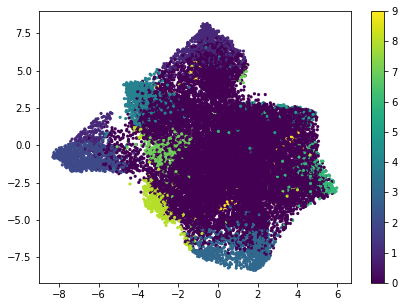

In [33]:
import umap.umap_ as umap

X_topics = svd_model.fit_transform(X)
my_topics = [np.argmax(x) for x in X_topics]
# print(my_topics)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1],  
            c = my_topics,
            s = 10, # size
            edgecolor='none'
            )
plt.colorbar();
plt.show()

In [18]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
print(dataset.target[:10])

[17  0 17 11 10 15  4 17 13 12]
